---
title: "Horoscope Analysis"
---

# Horoscope Analysis in English

This notebook demonstrates:

1. Reading a CSV file with horoscope data.
2. Cleaning and preparing the data.
3. Performing Sentiment Analysis using *TextBlob*.
4. Analyzing the frequency of words.
5. Creating a Word Cloud to visualize the most frequent words.



In [2]:
# ==========================================
# Cell 1: Install and import packages
# ==========================================

import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Sentiment analysis
from textblob import TextBlob

# Frequency of words
from collections import Counter

# Natural Language Toolkit for English
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Word Cloud
from wordcloud import WordCloud

# Download required NLTK resources if needed
nltk.download('stopwords')
nltk.download('punkt')

print("Packages imported successfully!")


Packages imported successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ronaldosoutomaior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ronaldosoutomaior/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# ==========================================
# Cell 2: Read and clean the CSV file
# ==========================================

# Adjust your CSV file path or name here
CSV_FILE = "daily_data.csv"

if not os.path.isfile(CSV_FILE):
    raise FileNotFoundError(f"CSV file '{CSV_FILE}' not found in the current directory.")

# 1) Read the CSV into a DataFrame
df = pd.read_csv(CSV_FILE)

# 2) Remove duplicates and rows with NaN in 'Horoscope'
df.drop_duplicates(inplace=True)
df.dropna(subset=['Horoscope'], inplace=True)

# 3) Convert text to lowercase
df['Horoscope'] = df['Horoscope'].str.lower()

# 4) Convert 'Date' column to datetime (optional, if you want time-based analyses)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Show the first few rows
df.head()


,Date,Zodiac Sign,Horoscope
0,2024-11-12,Aries,"nov 12, 2024 - if you've been working toward m..."
1,2024-11-12,Taurus,"nov 12, 2024 - obstacles that you encountered ..."
2,2024-11-12,Gemini,"nov 12, 2024 - a lot of activity could occur a..."
3,2024-11-12,Cancer,"nov 12, 2024 - whatever goals you've been tryi..."
4,2024-11-12,Leo,"nov 12, 2024 - events over which you seem to h..."


In [4]:
# ==========================================
# Cell 3: Sentiment Analysis (TextBlob)
# ==========================================

def get_sentiment(text):
    """
    Returns the sentiment polarity of the given text.
    Polarity ranges from -1 (negative) to +1 (positive).
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Create a new column 'Sentiment'
df['Sentiment'] = df['Horoscope'].apply(get_sentiment)

# Descriptive statistics for sentiment
df['Sentiment'].describe()


count    4218.000000
mean        0.171789
std         0.156417
min        -0.495833
25%         0.070000
50%         0.170833
75%         0.275000
max         1.000000
Name: Sentiment, dtype: float64

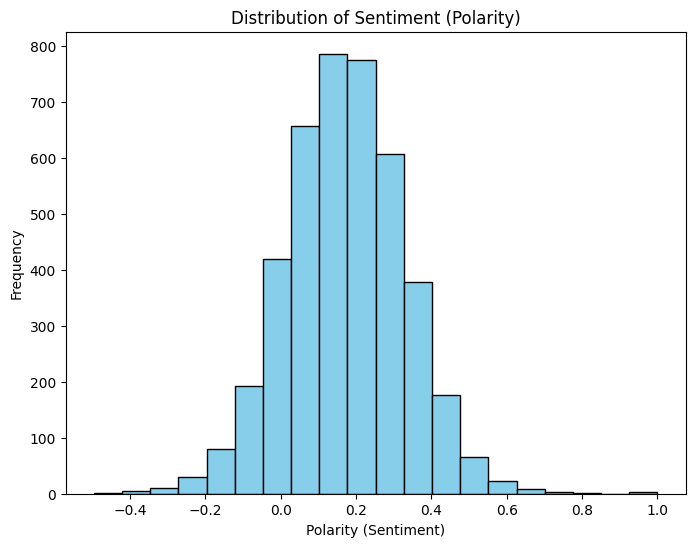

In [5]:
# ==========================================
# Cell 4: Visualize the distribution of sentiment
# ==========================================

plt.figure(figsize=(8,6))
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment (Polarity)')
plt.xlabel('Polarity (Sentiment)')
plt.ylabel('Frequency')
plt.show()


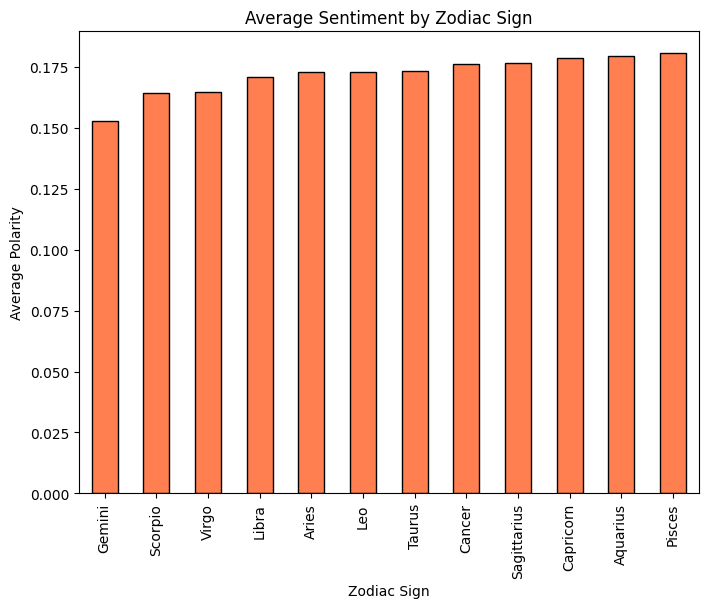

Zodiac Sign
Gemini         0.152627
Scorpio        0.164196
Virgo          0.164453
Libra          0.170660
Aries          0.172829
Leo            0.172886
Taurus         0.173174
Cancer         0.176022
Sagittarius    0.176327
Capricorn      0.178498
Aquarius       0.179354
Pisces         0.180392
Name: Sentiment, dtype: float64

In [6]:
# ==========================================
# Cell 5: Average sentiment by Zodiac Sign
# ==========================================

# Group by zodiac sign and compute the mean sentiment
sentiment_by_sign = df.groupby('Zodiac Sign')['Sentiment'].mean().sort_values()

plt.figure(figsize=(8,6))
sentiment_by_sign.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Sentiment by Zodiac Sign')
plt.xlabel('Zodiac Sign')
plt.ylabel('Average Polarity')
plt.show()

sentiment_by_sign


In [12]:
# ==========================================
# Cell 6: Word Frequency Analysis (Improved)
# ==========================================

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Define English stopwords
stop_words_en = set(stopwords.words('english'))

# Adicione palavras específicas que você quer remover (opcional)
custom_stopwords = {
    "could", "might", "dont", "youre", "youll", "thats", 
    "theyre", "im", "ive", "arent", "theres", 
    "today", "may", "time", "day", "people", 
    "things", "others", "take", "get", "make", "find", "want", 
    "try", "come", "like", "one", "someone", "perhaps", "likely",
    "problably", "youve", "great", "even", "much", "around", "especialy", 
    "problably", "let",  "feel", "feeling", "new", "way", "good", 
   "going", "probably", "especially", 
   "well", "right", "something",
   "jan", "feb", "mar", "apr", "may", "jun", 
   "jul", "aug", "sep", "oct", "nov", "dec","aries", "taurus", "gemini", "cancer", 
   "leo", "virgo", "libra", "scorpio", 
   "sagittarius", "capricorn", "aquarius", "pisces"

}
stop_words_en = stop_words_en.union(custom_stopwords)

# Concatenate all horoscopes into a single string
all_text = " ".join(df['Horoscope'].tolist())

# Remove punctuation/special characters, convert to lowercase
all_text_clean = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenize text
tokens = word_tokenize(all_text_clean)

# Filter tokens:
# - remove any token in stopwords
# - remove tokens containing digits
# - remove tokens with length <= 2
clean_tokens = []
for t in tokens:
    if t in stop_words_en: 
        continue
    if re.search(r'\d', t):  
        # se houver dígitos (ex. "2024" ou "2023"), descarta
        continue
    if len(t) <= 2:
        continue
    clean_tokens.append(t)

# Count the frequency of each token
word_counts = Counter(clean_tokens)
most_common_words = word_counts.most_common(20)

most_common_words 



[('need', 752),
 ('work', 669),
 ('life', 649),
 ('energy', 511),
 ('mind', 510),
 ('friends', 429),
 ('love', 410),
 ('person', 404),
 ('situation', 388),
 ('lot', 382),
 ('keep', 373),
 ('think', 368),
 ('isnt', 366),
 ('little', 363),
 ('also', 357),
 ('bit', 352),
 ('friend', 331),
 ('home', 330),
 ('important', 330),
 ('best', 328)]

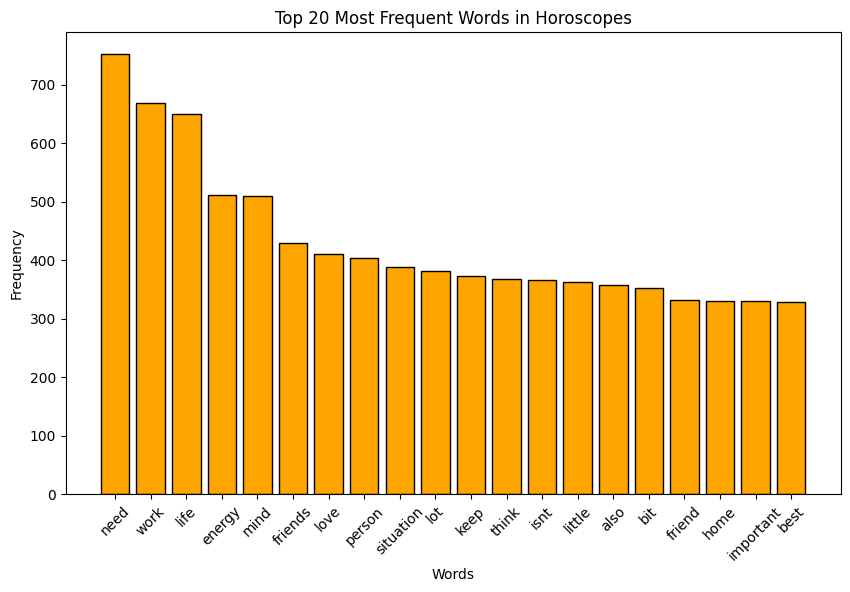

In [13]:
# ==========================================
# Cell 7: Plot the most frequent words
# ==========================================

words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='orange', edgecolor='black')
plt.title('Top 20 Most Frequent Words in Horoscopes')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


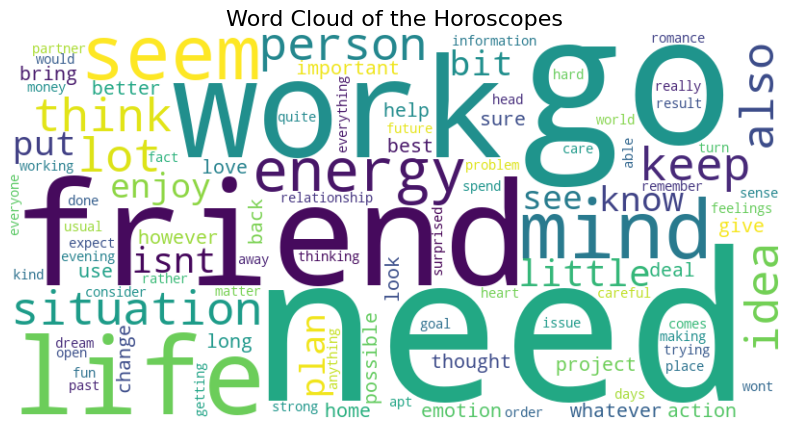

In [14]:
# ==========================================
# Cell 8: Word Cloud
# ==========================================

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stop_words_en, 
    max_words=100
).generate(all_text_clean)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of the Horoscopes", fontsize=16)
plt.show()


## Conclusions

- **Sentiment Analysis**: We computed an average sentiment polarity for each horoscope entry and visualized the distribution. 
- **Word Frequency**: The most frequent words reveal recurring themes or vocabulary across all horoscopes. 
- **Word Cloud**: Offers a quick visual overview of the predominant words used.

Possible **next steps**:
- Explore more advanced sentiment analysis techniques specialized for English (e.g., using a transformer model).
- Expand the dataset or compare with another source of horoscopes.
- If needed, re-add advanced **topic modeling** (like LDA) to explore major thematic clusters in the text.
